## PyTher: UNA LIBRERÍA Python DE CÓDIGO ABIERTO PARA MODELADO TERMODINÁMICO

Andrés Salazar*, Martín Cismondi

Instituto de Investigación y Desarrollo de Ingeniería de Procesos y Química Aplicada

(Universidad Nacional de Córdoba - CONICET)

Av. Haya de la Torre s/n, Córdoba - Argentina

E-mail: (andres.pyther@gmail.com)


# Software Abierto

![pilares_open_science](img/pilares_open_science.jpg)


![hacer_software](img/hacer_software.png)


![no_documentado](img/no_documentado.jpg)


![software_cientifico](img/software_cientifico.png)


![problemas_sc](img/problemas_sc.png)


# Evitar muchas versiones de código con unos pocos cambios que dificultan su revisión por parte del mundo y hasta nosotros mismos

![carpetas](img/carpetas.png)


# Git: Un controlador de versiones para organizar nuestro código y mostrarlo al mundo


![git](img/git.png)


# El flujo de trabajo en Git es simple. Código en nuestro computador que se "sube" a un repositorio en Internet, para que el mundo (y nosotros mismo) lo puedan "bajar", ver, copiar, distribuir libremente

![flujo_git](img/flujo_git.png)


![git_hub](img/git_hub.png)


# Termodinámica

# Comportamiento del equilibrio de fases con ecuaciones cúbicas de estado

![plan_trabajo_simplificado](img/plan_trabajo_simplificado.jpg)


# PyTher

# A never-ending search for the truth: Thermodynamics in the uncertain era of the internet

![proyeccion_datos_termodinamica](img/proyeccion_datos_termodinamica.jpg)

### Crecimiento exponencial de los datos termofísicos reportados en la lietratura especializada. Difícil de revisar, procesar y obtener valor de los datos. [MichaelFrenkel, 2015](http://www.sciencedirect.com/science/article/pii/S0021961414003875)



**Pyther** es una librería desarrollada principalmente en **Python**, Fortran y C, para ser utilizada en el entorno interactivo Jupyter, enfocada en la obtención, procesamiento y visualización de la creciente cantidad de datos relevantes para el analisis de problemas en termodinámica del equilibrio de fases, siguiendo la filosofía **open source** y **open science**.

![proyeccion_datos_termodinamica](img/que_es_python.jpg)


# Arquitectura de PyTher

![Pyther_arquitectura](img/Pyther_arquitectura_reformada_3.jpg)


# Capacidades en desarrollo

# Implementaciones

- Obtención, procesamiento y visualización de datos
- Parámetros y ecuaciones de estado (SRK, PR y RKPR)
- Correlaciones para propiedades termofísicas de sustancias puras
- Digramas de equilibrio de fases de sustancia puras

PyTher utiliza la base de datos DIPPR-2003 para calcular 13 propiedades termofísicas de sustancia pura:

- Densidad del sólido y líquido
- Presión de vapor y calor de vaporización
- Capacidad calorífica del sólido, líquido y gas ideal
- Segundo coeficiente virial
- Viscosidad de líquido y vapor
- Conductividad térmica del líquido y del vapor
- Tensión superficial

### trabajo futuro...

# Digrama para sustancia pura

![Pyther_arquitectura](img/envelope.png)


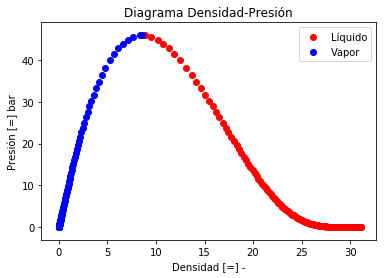

In [12]:
pyplot.scatter(VolumenLiqVAP,PresionVAP, color = 'red', label = 'Líquido')
pyplot.scatter(VolumenVapVAP,PresionVAP, color = 'blue', label = 'Vapor')
pyplot.title('Diagrama Densidad-Presión')
pyplot.legend(loc="upper right") 
pyplot.xlabel('Densidad [=] -')  
pyplot.ylabel('Presión [=] bar')

# Pero, los más interesante es el procesamiento de datos, por ejemplo...

In [4]:
import numpy as np
import pandas as pd
import pyther as pt
import matplotlib.pyplot as plt
%matplotlib inline

# Especificar multiples sustancias puras y varias condiciones

Es común que se requiera analizar multiples sustancias de forma simultanea con la especificación de varias condiciones de un modelo (por ejemplo **valores de temperaturas**), de tal forma que se obtendran una gran cantidad de valores (por ejemplo **una propiedad termodinámica**) que conforman un set de datos (en principio desestructurados), que en general demanda mucho tiempo en revisar y (**limpiar datos**) para encontrar resultados que no interesan o son invalidos (por ejemplo **predicciones fuera del rango de aplicación de un modelos termodinámico**)

# Veamos un caso típico...

Se obtiene una cierta cantidad de datos desestructurados y sin formato que dificulta diferenciar los resultados *"buenos de los malos"*

In [7]:
thermodynamic_correlations = pt.Thermodynamic_correlations()

components = ["METHANE", "n-TETRACOSANE", "n-PENTACOSANE", "ETHANE", "ISOBUTANE", "PROPANE", "3-METHYLHEPTANE"]
property_thermodynamics = "Vapour_Pressure"
temperature = [180.4, 181.4, 185.3, 210, 800]

Vapour_Pressure = thermodynamic_correlations.property_cal(components, property_thermodynamics, temperature)
print("Vapour Pressure = {0}". format(Vapour_Pressure))

----------------------------------------------------------------------
Pure substances with a temperature especific: ['METHANE', 'n-TETRACOSANE', 'n-PENTACOSANE', 'ETHANE', 'ISOBUTANE', 'PROPANE', '3-METHYLHEPTANE']
----------------------------------------------------------------------
[180.4, 181.4, 185.3, 210, 800]
Temperature_enter = [[180.4, 181.4, 185.3, '210 K is a temperature not valid', '800 K is a temperature not valid'], ['180.4 K is a temperature not valid', '181.4 K is a temperature not valid', '185.3 K is a temperature not valid', '210 K is a temperature not valid', 800], ['180.4 K is a temperature not valid', '181.4 K is a temperature not valid', '185.3 K is a temperature not valid', '210 K is a temperature not valid', 800], [180.4, 181.4, 185.3, 210, '800 K is a temperature not valid'], [180.4, 181.4, 185.3, 210, '800 K is a temperature not valid'], [180.4, 181.4, 185.3, 210, '800 K is a temperature not valid'], [180.4, 181.4, 185.3, 210, '800 K is a temperature not vali

Al incrementar el número de sustancias, de ensayos, de experimentos, etc... Se comienza a complicar el procesamiento de los datos, por tanto, conviene integrar **PyTher** con librerías especializadas para el procesamiento de datos como *Pandas* para obtener resultados más eficientes.

### Función = data_temperature(components, temperature, Vapour_Pressure, temp_enter)

- Por ejemplo, la función **data_temperature()** organiza los resultados obtenidos (**Vapour_Pressure**), diferenciando las temperaturas fuera del intervalo de aplicación de la correlación termodinámica (*NaN*), de forma estructurada y poder exportarlo en un formato conveniente:

(csv, txt, hoja de cálculo, etc).

In [10]:
temp_enter = thermodynamic_correlations.temperature_enter
thermodynamic_correlations.data_temperature(components, temperature, Vapour_Pressure, temp_enter)

,180.4 K,181.4 K,185.3 K,210 K,800 K
METHANE,3.332655e+01,3.443423e+01,3.901608e+01,NaN,NaN
n-TETRACOSANE,NaN,NaN,NaN,NaN,9.233920
n-PENTACOSANE,NaN,NaN,NaN,NaN,7.913003
ETHANE,8.039411e-01,8.506357e-01,1.053358e+00,3.338109,NaN
ISOBUTANE,7.437302e-03,8.163530e-03,1.160766e-02,0.075657,NaN
PROPANE,5.189654e-02,5.605831e-02,7.505225e-02,0.358727,NaN
3-METHYLHEPTANE,2.098781e-07,2.504942e-07,4.890391e-07,0.000018,NaN


# Documentación 

### PyTher cuenta con documentación abierta (incluyendo errores cometidos, porque open science también es publicar los muchos desaciertos que allanaron el camino de los pocos aciertos) y disponible en Internet con una revisión y construcción continua...

![Pyther_arquitectura](img/notebook_idea.jpg)


In [17]:
from IPython.display import IFrame
documentation_pyther = "http://pyther.readthedocs.io/es/latest/index.html"
IFrame(documentation_pyther, width=950, height=350)

# Finalmente... También utiliza PyTher sin escribir código...

![Pyther_arquitectura](img/caiq_17.gif)


# Muchas Gracias

![pyther_isologo](img/pt.png)
